Initial Insights from the Dataset:

768 entries, 9 columns.

Features:

Numerical: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

Target Variable: Outcome (0 = No Diabetes, 1 = Diabetes).

No missing values (according to .info()), but zeros in Insulin, SkinThickness, BloodPressure, and Glucose may indicate missing values.

In [1]:
import pandas as pd

# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

Key Findings:

Potential Missing Values:

Several features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have zero values, which are biologically unlikely and likely indicate missing data.

Feature Distributions:

Glucose, BMI, and Age appear normally distributed.

Insulin and SkinThickness are skewed with many zeros.

Pregnancies has a right-skewed distribution (most values are low but some outliers exist).

Next Steps:

Handle missing values (replace zeros with median/mean or use imputation).

Check correlations between features and target variable.

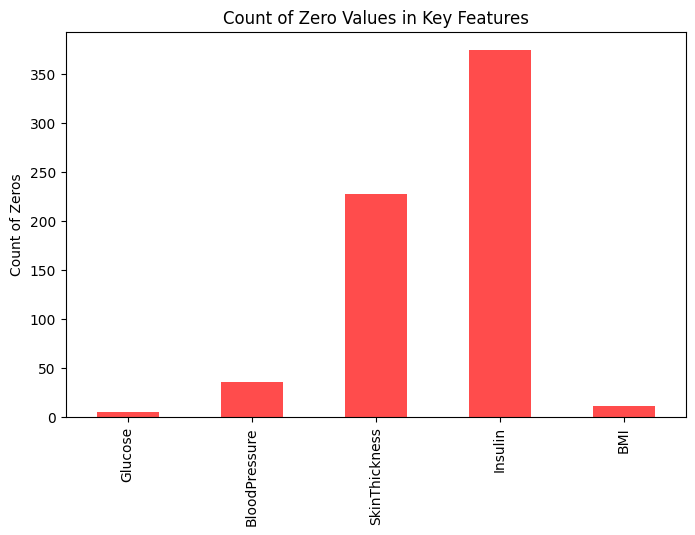

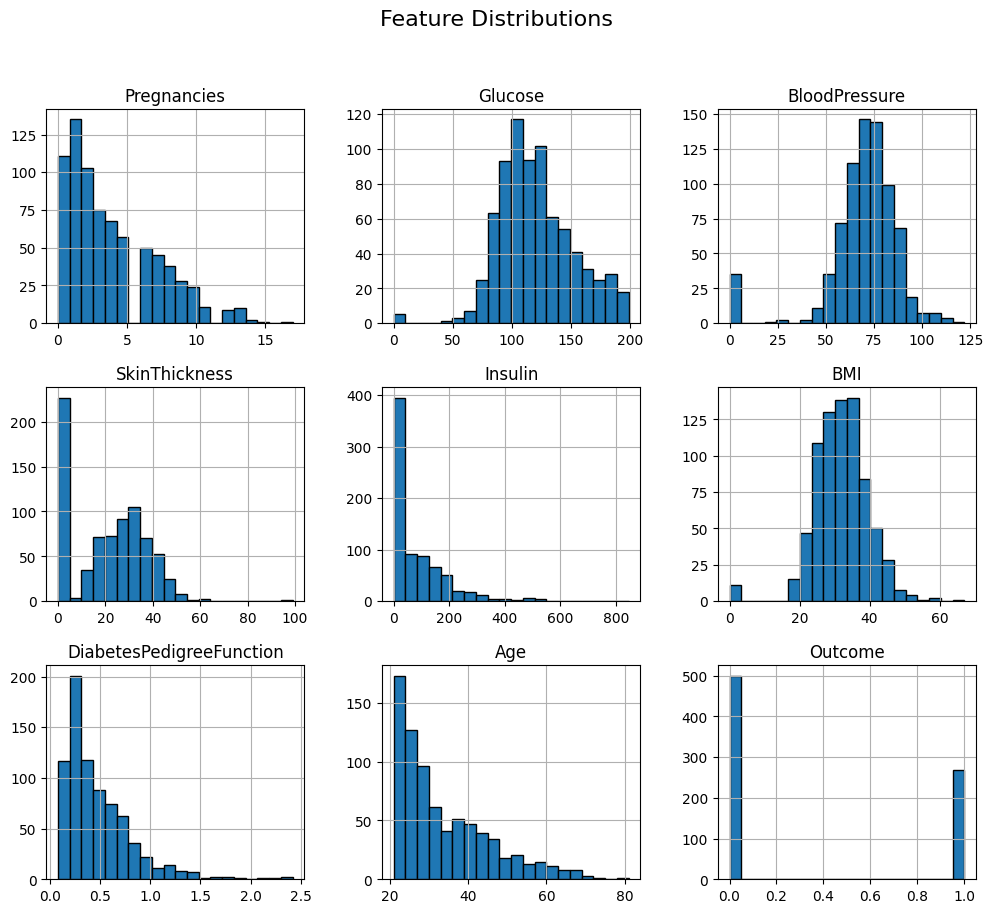

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for zero values in features where zero is not a valid measurement
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
zero_counts = (df[columns_with_zeros] == 0).sum()

# Plot the count of zero values per feature
plt.figure(figsize=(8, 5))
zero_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title("Count of Zero Values in Key Features")
plt.ylabel("Count of Zeros")
plt.show()

# Plot distribution of numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Correlation Insights:

Glucose has the strongest positive correlation with Outcome (0.47), meaning higher glucose levels are associated with diabetes.

BMI, Age, and Pregnancies also show moderate correlation with Outcome.

Insulin and SkinThickness have weak correlations, likely due to missing values (zeros).

BloodPressure has almost no correlation with Outcome (-0.07).

Next Steps:

Handle missing values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI (replace zeros with the median).

Normalize numerical features to improve model performance.

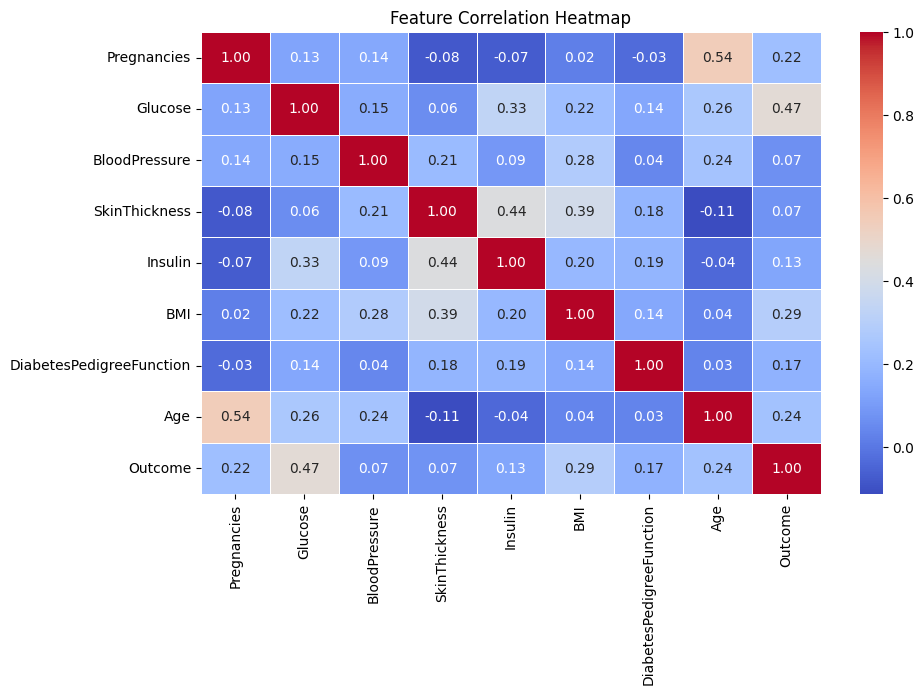

In [3]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Missing Value Handling Complete:

Zeros in key features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have been replaced with their respective median values.

The dataset is now free of biologically invalid zero values.

Next Steps:

Normalize numerical features (Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) to ensure better model performance.

Encode categorical variables (not needed here since Outcome is already numeric).

In [4]:
# Replace zero values with median in selected columns
for col in columns_with_zeros:
    median_value = df[col].median()
    df[col].replace(0, median_value, inplace=True)

# Verify replacement
df[columns_with_zeros].describe()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911
std,30.438286,12.096642,9.229014,105.547598,6.875366
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,23.000000,30.500000,27.500000
50%,117.000000,72.000000,23.000000,31.250000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


Normalization Complete:
All numerical features are now scaled between 0 and 1 using Min-Max Scaling.
This ensures that features with different units (e.g., Glucose vs. Insulin) contribute proportionally to the model.